In [1]:
import random
import matplotlib.pyplot as plt
import time
import numpy as np

Generate 2D points using a multivariate Gaussian distribution. Use the following code to
generate two sets, each with 500 points, with different centers and save them to one variable, shuffled. The generated graph should be similar to the one presented in Fig. 1.

In [ ]:
class UnsupervisedLearning:
    
    def __init__(self) -> None:
        pass

    

In [2]:
def ex1():

    mean = [3, 3]
    cov = [[1, 0], [0, 1]]
    a = np.random.multivariate_normal(mean, cov, 500).T
    mean = [-3, -3]
    cov = [[2, 0], [0, 5]]
    b = np.random.multivariate_normal(mean, cov, 500).T

    c = np.concatenate((a, b), axis=1)
    c = c.T
    np.random.shuffle(c)
    c = c.T

    x = c[0]
    y = c[1]

    plt.plot(x, y, 'x')
    plt.axis('equal')

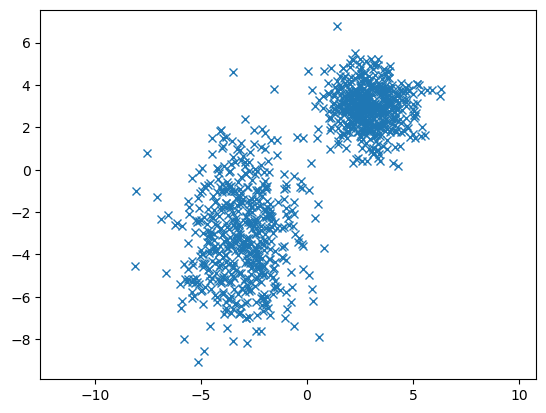

In [3]:
if __name__ == "__main__":

    ex1()